In [7]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

In [8]:
batch=32
lr=0.01
hidden_layers = [300,200]
output_size = 10

In [9]:

trainset = datasets.MNIST('./dataset/MNIST', train=True, transform=transform, download=True)
trainloader = DataLoader(trainset, batch_size=batch, shuffle=True)

testset = datasets.MNIST('./dataset/MNIST', train=False, transform=transform, download=True)
testloader = DataLoader(testset, batch_size=batch, shuffle=True)

input_size = trainloader.dataset.train_data.shape[1] * trainloader.dataset.train_data.shape[2]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [10]:
def init_weights_uniform(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.uniform_(m.weight,-1.0,1.0)

In [11]:
def init_weights_zero(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.zeros_(m.weight)

In [12]:
def ourmodel(input_size, hidden_layers, output_size):
    model = torch.nn.Sequential(
        torch.nn.Linear(input_size, hidden_layers[0]),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hidden_layers[0], hidden_layers[1]),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hidden_layers[1], output_size),
        torch.nn.LogSoftmax(dim=1)
    )
    return model

Epoch: 1, Running loss: 2.305009884007772, Test Error Percent: 88.6500015258789 %
Epoch: 2, Running loss: 2.304752731068929, Test Error Percent: 90.18000030517578 %
Epoch: 3, Running loss: 2.30471307703654, Test Error Percent: 89.9000015258789 %
Epoch: 4, Running loss: 2.304401459121704, Test Error Percent: 89.91000366210938 %
Epoch: 5, Running loss: 2.3048692557017008, Test Error Percent: 88.6500015258789 %
Epoch: 6, Running loss: 2.304597538884481, Test Error Percent: 88.6500015258789 %
Epoch: 7, Running loss: 2.3043287914276123, Test Error Percent: 88.6500015258789 %
Epoch: 8, Running loss: 2.3043704332987467, Test Error Percent: 90.26000213623047 %
Epoch: 9, Running loss: 2.304366054026286, Test Error Percent: 88.6500015258789 %
Epoch: 10, Running loss: 2.30392620900472, Test Error Percent: 88.6500015258789 %
Epoch: 11, Running loss: 2.304178125635783, Test Error Percent: 88.6500015258789 %
Epoch: 12, Running loss: 2.3040310848236083, Test Error Percent: 89.9000015258789 %
Epoch: 1

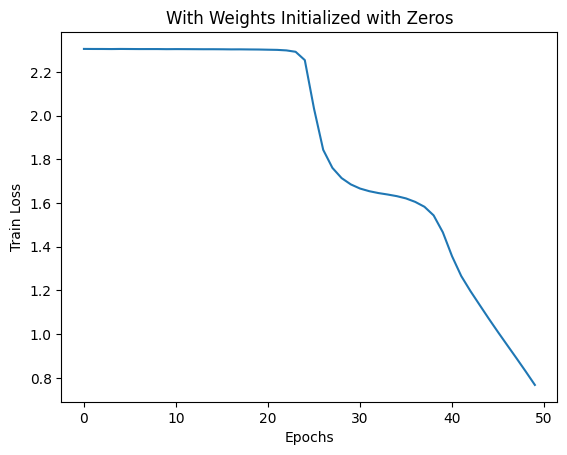

In [13]:
model_zero = ourmodel(input_size, hidden_layers, output_size)
model_zero.apply(init_weights_zero)
# print(model)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_zero.parameters(), lr=lr)

epochs = 50
losses = []
for e in range(epochs):
    running_loss = 0
    for x, y in trainloader:
        
        x = x.view(x.shape[0], -1)
        
        optimizer.zero_grad()        
        output = model_zero(x)
        loss = criterion(output, y)
        
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    

    correct=0
    with torch.no_grad():
        for images,labels in testloader:
            logps = model_zero(images.view(images.shape[0], -1))
            output = torch.squeeze(logps)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(labels.data.view_as(pred)).sum()
    # print(f"Test Accuracy Percent: {100. * correct / len(testloader.dataset)} %")
    print(f"Epoch: {e+1}, Running loss: {running_loss/len(trainloader)}, Test Error Percent: {100 - (100. * correct / len(testloader.dataset))}%")
    losses.append(running_loss/len(trainloader))

plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title("With Weights Initialized with Zeros")
plt.plot(losses)
plt.show()

Epoch: 1, Running loss: 1.4408201338132223, Test Error Percent: 25.169998168945312 %
Epoch: 2, Running loss: 0.6968345484813054, Test Error Percent: 19.150001525878906 %
Epoch: 3, Running loss: 0.5643763574361801, Test Error Percent: 16.209999084472656 %
Epoch: 4, Running loss: 0.4970186066389084, Test Error Percent: 14.629997253417969 %
Epoch: 5, Running loss: 0.4532574522892634, Test Error Percent: 13.639999389648438 %
Epoch: 6, Running loss: 0.4219057656447093, Test Error Percent: 12.680000305175781 %
Epoch: 7, Running loss: 0.39682982743779815, Test Error Percent: 11.919998168945312 %
Epoch: 8, Running loss: 0.3771878443559011, Test Error Percent: 11.55999755859375 %
Epoch: 9, Running loss: 0.3603481178601583, Test Error Percent: 11.05999755859375 %
Epoch: 10, Running loss: 0.34568589028517405, Test Error Percent: 10.919998168945312 %
Epoch: 11, Running loss: 0.3330579487125079, Test Error Percent: 10.540000915527344 %
Epoch: 12, Running loss: 0.3218561962227027, Test Error Percent

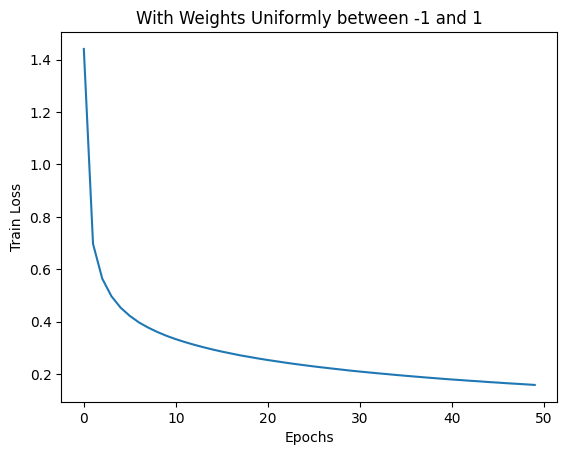

In [14]:
model_uni = ourmodel(input_size, hidden_layers, output_size)
model_uni.apply(init_weights_uniform)
# print(model)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_uni.parameters(), lr=lr)

epochs = 50
losses = []
for e in range(epochs):
    running_loss = 0
    for x, y in trainloader:
        
        x = x.view(x.shape[0], -1)
        
        optimizer.zero_grad()        
        output = model_uni(x)
        loss = criterion(output, y)
        
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    

    correct=0
    with torch.no_grad():
        for images,labels in testloader:
            logps = model_uni(images.view(images.shape[0], -1))
            output = torch.squeeze(logps)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(labels.data.view_as(pred)).sum()
    # print(f"Test Accuracy Percent: {100. * correct / len(testloader.dataset)} %")
    print(f"Epoch: {e+1}, Running loss: {running_loss/len(trainloader)}, Test Error Percent: {100 - (100. * correct / len(testloader.dataset))} %")
    losses.append(running_loss/len(trainloader))

plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title("With Weights Uniformly between -1 and 1")
plt.plot(losses)
plt.show()